In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
import datetime as dt
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
combined_data = cheetah.join(strava, how='inner')
combined_data.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
2018-01-27 19:39:49+00:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride
2018-01-27 20:01:32+00:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race
2018-01-31 21:13:34+00:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride
2018-02-05 21:06:42+00:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride
2018-02-07 06:59:05+00:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride


## Question 1

In [5]:
# Drop all rides with no measured power
combined_data.drop(combined_data[combined_data.device_watts==False].index, inplace=True)
combined_data.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
2018-01-27 19:39:49+00:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride
2018-01-27 20:01:32+00:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race
2018-02-05 21:06:42+00:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride
2018-02-07 06:59:05+00:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride
2018-02-09 19:18:03+00:00,02/10/18,06:18:03,2018_02_10_06_18_03.json,189.918,0.70865,125.8670,1.31962,1.54810,212.977,0.79469,...,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride


## Question 2

Text(0.5, 1.0, 'Time')

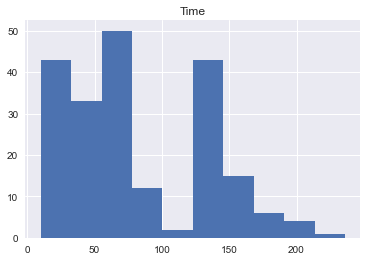

In [6]:
# Make histogram for moving time
combined_data.moving_time.hist()
plt.title("Time")

Moving time is bimodally distributed

Text(0.5, 1.0, 'Distance')

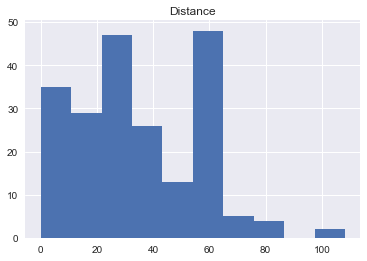

In [7]:
# Histogram for distance
combined_data.distance.hist()
plt.title("Distance")

Distance is right-skewed

Text(0.5, 1.0, 'Average Speed')

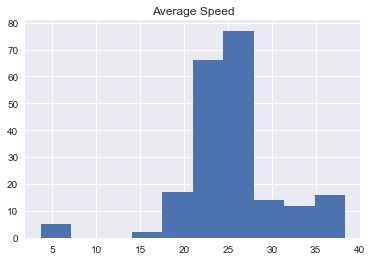

In [8]:
# Histogram for Average Speed
combined_data['Average Speed'].hist()
plt.title("Average Speed")

Average Speed seems to be normally distributed

Text(0.5, 1.0, 'Average Power')

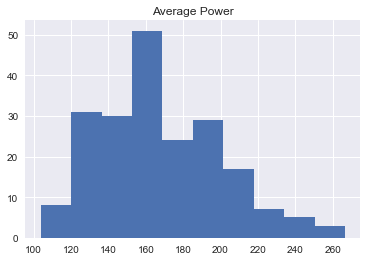

In [9]:
combined_data.average_watts.hist()
plt.title("Average Power")

Average Power seems to be normally distributed

Text(0.5, 1.0, 'TSS')

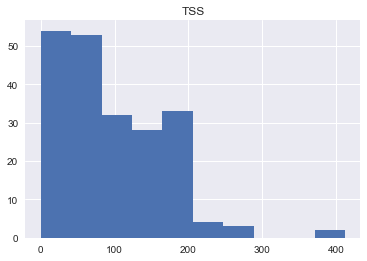

In [10]:
combined_data.TSS.hist()
plt.title("TSS")

TSS is right-skewed

## Question 3

In [11]:
# Correlation of some key variables
combined_data1= combined_data[['distance', 'moving_time', 'Average Speed', 'Elevation Gain','TSS', 'NP',
                                   'average_heartrate','average_watts']]
combined_data1.corr()

,distance,moving_time,Average Speed,Elevation Gain,TSS,NP,average_heartrate,average_watts
distance,1.000000,0.939383,0.187363,0.805468,0.922565,0.270703,0.114595,0.031858
moving_time,0.939383,1.000000,-0.103484,0.813146,0.871368,0.044431,-0.048611,-0.112507
Average Speed,0.187363,-0.103484,1.000000,-0.016160,0.134054,0.674857,0.742388,0.720608
Elevation Gain,0.805468,0.813146,-0.016160,1.000000,0.828928,0.229933,0.071553,-0.100030
TSS,0.922565,0.871368,0.134054,0.828928,1.000000,0.432286,0.113775,0.150163
NP,0.270703,0.044431,0.674857,0.229933,0.432286,1.000000,0.593091,0.772574
average_heartrate,0.114595,-0.048611,0.742388,0.071553,0.113775,0.593091,1.000000,0.672457
average_watts,0.031858,-0.112507,0.720608,-0.100030,0.150163,0.772574,0.672457,1.000000


There are some observed relationships between: 
   * Distance and moving time
   * Distance and elevation gain
   * Distance and Training Stress Score (TSS)
   * TSS and moving time
   * moving time and Elavation gain
   * Average Speed and Average heart rate
   * Average Speed and power
   * Elevation Gain and TSS
   * Normalised power (NP) and Power
   * NP and Average Speed
   * Average Heart rate and Power
   
All of them are positive linear associations due to their high correlation (from 0.67 to 0.94)

## Question 4

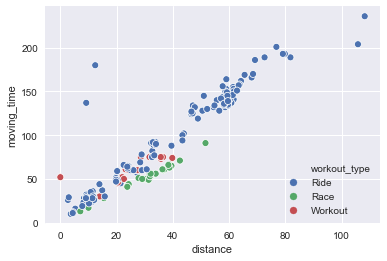

In [12]:
sns.scatterplot(data=combined_data, x='distance',y='moving_time', hue="workout_type")

Ride has the highest number of rides and a wide range in moving time and distance, comparing to other 2 categories. While Ride can go up to more than 200 in time and 100 in distance, Race and Workout have significantly much less moving time and shorter distance.

{'whiskers': [<matplotlib.lines.Line2D at 0x1e80a82c310>,
 'caps': [<matplotlib.lines.Line2D at 0x1e80a82c9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e80a821f70>,
 'medians': [<matplotlib.lines.Line2D at 0x1e80a8370d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e80a8373d0>,
 'means': []}

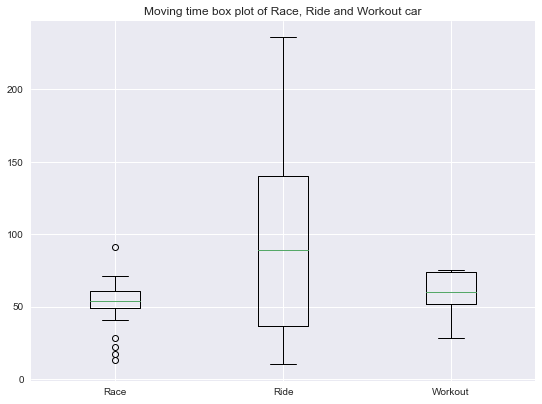

In [13]:
# Make datasets for each workout type
Race_data=combined_data[(combined_data['workout_type']== "Race")].moving_time
Ride_data=combined_data[(combined_data['workout_type']== "Ride")].moving_time
Workout_data=combined_data[(combined_data['workout_type']== "Workout")].moving_time
Workouttype_data=[Race_data,Ride_data,Workout_data]

# Boxplot
fig = plt.figure(figsize =(7, 5)) 
ax = fig.add_axes([0, 0, 1, 1]) 

plt.title("Moving time box plot of Race, Ride and Workout car")
ax.set_xticklabels(['Race', 'Ride','Workout'])
plt.boxplot(Workouttype_data)

Ride has the most rides, biggest range and highest median moving time; while Race has the less rides, smallest range and lowest median moving time, followed by Workout with a mild difference. Only Race has some outliers, which are pretty far from the box.

## Question 5

In [14]:
# prepare weather 2018 dataset
weather2018 = pd.read_csv('data/weather_data_2018.csv')
weather2018['date']= pd.to_datetime(weather2018[['Month','Day','Year']])
weather2018.index= weather2018['date']
weather2018.drop(['Month','Day'], axis=1, inplace = True)
weather2018.head()

,Product code,Bureau of Meteorology station number,Year,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,date
date,,,,,,,
2018-01-01,IDCJAC0010,66212,2018,30.9,1.0,Y,2018-01-01
2018-01-02,IDCJAC0010,66212,2018,28.8,1.0,Y,2018-01-02
2018-01-03,IDCJAC0010,66212,2018,25.3,1.0,Y,2018-01-03
2018-01-04,IDCJAC0010,66212,2018,25.4,1.0,Y,2018-01-04
2018-01-05,IDCJAC0010,66212,2018,28.9,1.0,Y,2018-01-05


In [15]:
#Prepare weather 2019 dataset
weather2019 = pd.read_csv('data/weather_data_2019.csv')
weather2019['date']= pd.to_datetime(weather2019[['Month','Day','Year']])
weather2019.index= weather2019['date']
weather2019.drop(['Month','Day'], axis=1, inplace = True)
weather2019.head()

,Product code,Bureau of Meteorology station number,Year,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,date
date,,,,,,,
2019-01-01,IDCJAC0010,66212,2019,34.0,1.0,Y,2019-01-01
2019-01-02,IDCJAC0010,66212,2019,30.6,1.0,Y,2019-01-02
2019-01-03,IDCJAC0010,66212,2019,28.9,1.0,Y,2019-01-03
2019-01-04,IDCJAC0010,66212,2019,33.7,1.0,Y,2019-01-04
2019-01-05,IDCJAC0010,66212,2019,39.3,1.0,Y,2019-01-05


In [16]:
# Combine 2 weather data sets
weather_combined = weather2018.append(weather2019)
weather_combined.index.name=None
weather_combined.head()

,Product code,Bureau of Meteorology station number,Year,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,date
2018-01-01,IDCJAC0010,66212,2018,30.9,1.0,Y,2018-01-01
2018-01-02,IDCJAC0010,66212,2018,28.8,1.0,Y,2018-01-02
2018-01-03,IDCJAC0010,66212,2018,25.3,1.0,Y,2018-01-03
2018-01-04,IDCJAC0010,66212,2018,25.4,1.0,Y,2018-01-04
2018-01-05,IDCJAC0010,66212,2018,28.9,1.0,Y,2018-01-05


In [17]:
# Set similar index format to combine cycling data set and weather data set
combined_data['date']= pd.to_datetime(combined_data['date'])
result = pd.merge(weather_combined, combined_data, on='date')
result.head()

,Product code,Bureau of Meteorology station number,Year,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,date,time,filename,axPower,...,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
0,IDCJAC0010,66212,2018,30.7,1.0,Y,2018-01-28,06:39:49,2018_01_28_06_39_49.json,202.211,...,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride
1,IDCJAC0010,66212,2018,30.7,1.0,Y,2018-01-28,07:01:32,2018_01_28_07_01_32.json,226.039,...,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race
2,IDCJAC0010,66212,2018,28.2,1.0,Y,2018-02-06,08:06:42,2018_02_06_08_06_42.json,221.672,...,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride
3,IDCJAC0010,66212,2018,28.1,1.0,Y,2018-02-07,17:59:05,2018_02_07_17_59_05.json,218.211,...,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride
4,IDCJAC0010,66212,2018,30.3,1.0,Y,2018-02-10,06:18:03,2018_02_10_06_18_03.json,189.918,...,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride


In [18]:
# Check correlation among 3 variables
result[['distance', 'Maximum temperature (Degree C)', 'Average Speed']].corr()

,distance,Maximum temperature (Degree C),Average Speed
distance,1.000000,0.001931,0.187363
Maximum temperature (Degree C),0.001931,1.000000,-0.091050
Average Speed,0.187363,-0.091050,1.000000


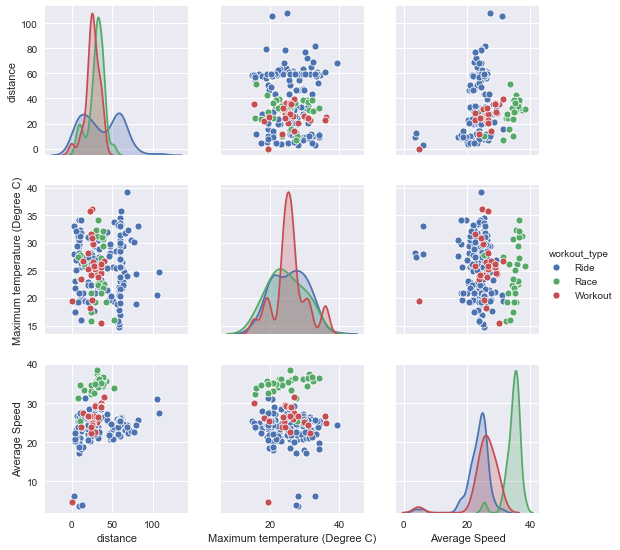

In [19]:
sns.pairplot(result[['distance', 'Maximum temperature (Degree C)', 'Average Speed','workout_type']], hue = 'workout_type')

There is no observed relationship between distance and temperature, and between average speed and temperature

## Challenge

In [20]:
challenge_data= combined_data[['distance', 'moving_time', 'Average Speed', 'Elevation Gain','TSS', 'NP',
                                   'average_heartrate','average_watts', 'kudos','workout_type','Duration','average_temp',
                              'Calories (HR)','Average Power','VAM','1 sec Peak Power' ]]

In [21]:
# summarizing the likes of each catergory
challenge_data.groupby(['workout_type'])['kudos'].sum()

workout_type
Race        474
Ride       1723
Workout     193
Name: kudos, dtype: int64

Ride is the most popular

In [22]:
challenge_data.corrwith(challenge_data['kudos'])

distance             0.753808
moving_time          0.663127
Average Speed        0.393050
Elevation Gain       0.637602
TSS                  0.694799
NP                   0.353419
average_heartrate    0.387071
average_watts        0.245937
kudos                1.000000
Duration             0.659296
average_temp         0.001101
Calories (HR)        0.634821
Average Power        0.264819
VAM                  0.302228
1 sec Peak Power     0.480947
dtype: float64

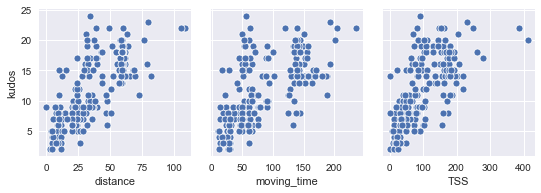

In [23]:
sns.pairplot(challenge_data,
            x_vars=['distance','moving_time','TSS'],
            y_vars=['kudos'])

Distance, moving time and TSS are 3 variables that have moderately high and positive correlation with Kudos. That means it can be understood that the more distance, time and TSS are, the more likes we seem to get.